The course did a *terrible* job of introducing MLE, forcing me to scurry elsewhere for info. Putting my thoughts down now, subject to future revision.

### Probability vs. Likelihood

First, this is my understanding of the difference between probability and likelihood. Probability is deductive, reasoning from the general to the particular. For example, given a Bernoulli random variable with probability $p$ of success on any given trial (let's say it's a fair coin), what is the probability that we will get $n$ successes in a row? So for example, three heads in a row.

The probability of the outcome is conditioned on two parameters, $p$ and $n$, so this is a binomial variable. The rule about probabilities is that all of the possible outcomes must sum up to one. The possibilities in three flips of a coin are:

HHH  
HTH  
HHT  
THH  
HTT  
THT  
TTH  
TTT

Each has a probability of $1/8$ and there are 8 possible outcomes, so the probabilities sum up to one.

Likelihood is inductive, reasoning from the particulars to the general. For example, given that a coin flipped three times returns three heads, what is the likelihood that the coin is fair? This is *not* a probability, and the easiest reason to see why is that the sum of all likelihoods do not sum up to one; they are infinite. We can ask the likelihood that the coin is fair, $P(H)=0.5$, but there are infinite other likelihoods, $P(H)=0.49$, $P(H)=0.499$ and so on. The likelihoods are based on the coin's probability $p$, which is continuous.

So we cannot say that three heads tell us there is a $1/8$ probability that the coin is fair. We must say that there is a $1/8$ likelihood that it is fair.

Another way I saw to think about this is that probability is concerned with the area under a normal curve. Need to review that video again and put it into words here.

### Maximimum Likelihood Estimate

The maximum likelihood estimate is at bottom a simple concept. Given an outcome like three heads in a row, we can have an infinite number of hypotheses about the probability of the coin returning a head. To find the best answer, we can test various hypotheses and navigate to the best answer.

The maximum likelihood estimate maximizes this:

$$\prod_{i=1}^{n} p_{\theta}(x_i)$$

where $n$ is the number of items in the outcome, $x_i$ is one of the elements in the outcome, and $p_{\theta}(x_i)$ is the probability of that outcome, given the hypothesiszed probability of the random variable.

Example. Suppose that we get three heads, and our hypothesis is that the coin is fair. The likelihood is

$$\prod_{i=1}^{3} p_{\theta}(x_i) = {3 \choose 3} (1/2)^3 \cdot (1/2)^0 = 0.125$$

The likelihood that the coin has a probability of 0.7 for heads is

$${3 \choose 3} (0.7)^3 * (0.3)^0 = .343$$

The likelihood that the coin has a probability of 0.9 for heads is

$${3 \choose 3} (0.9)^3 * (0.1)^0 = 0.729$$

And finally, the likelihood that the coin has a probability of 1.0 for heads is

$${3 \choose 3} (1.0)^3 * (0.0)^0 = 1.0$$

This should make it clear why a likelihood is not a probability. It makes sense that, if the *only* information we have is that a coin landed heads three times in a row, our maximum likelihood estimatation is that the coin *always* returns heads. That does not mean this is the actual probability of the coin; simple intuition tells us that. But given the data at hand, a coin that returns nothing but heads is most likely.

Now consider a case where there are two heads and one tail. The likelihood that the coin is fair ($p = 0.5)$ is

$${3 \choose 2} (1/2)^2 \cdot (1/2)^1 = 0.375$$

What about the probability that the coin always returns heads?

$${3 \choose 2} (1.0)^2 \cdot (0)^1 = 0$$

This is intuitive. If we have seen a tails once, we know that the coin cannot return heads on every flip.

The likelihood that the coin returns heads with a probability of 0.6 is

$${3 \choose 2} (0.6)^2 \cdot (0.4)^1 = 0.432$$

So a probability of 0.6 is more likely for the coin than a probability of 0.5. What about 0.7?

$${3 \choose 2} (0.7)^2 \cdot (0.3)^2 = 0.441$$

And now 0.8:

$${3 \choose 2} (0.8)^2 \cdot (0.2)^1 = 0.384$$

So now the likelihood has dropped between the hypotheses of $p=0.7$ and $p=0.8$. So let's plot a curve for likelihoods of probabilities from 0.9 down to 0.1.

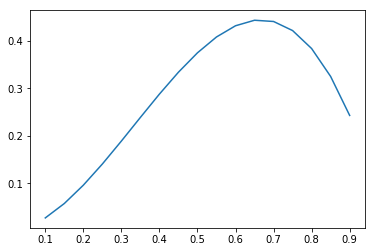

0.4409999999999999

In [33]:
import numpy as np
import matplotlib.pyplot as plt
flips = np.array([1,1,0])
probs = np.arange(0.1, 0.95, step=0.05)
likelihoods = np.array([probs, np.repeat(0, 17)])
for i in np.arange(0, 17):
    l = 3 * probs[i]**2 * (1-probs[i])
    likelihoods[1][i] = l
plt.plot(likelihoods[0], likelihoods[1])
plt.show()

It looks like the maximum likelihood estimation is around 0.667 and this comes as no surprise. The result we saw was that 2/3 of the flips resulted in heads, so the most likely estimate for the coin's probability is 0.667. The actual value:

$${3 \choose 2} (0.667)^2 * (0.333)^1 = 0.444$$

And this is higher than the likelihood for either 0.7 or 0.6.

This is a very roundabout way of coming to the conclusion that, if we *see* a coin produce heads 2/3 of the time, and we have no other information about the coin, then we conclude that it is likely to keep producing heads 2/3 of the time. This is a great example of the difference between a purely analytical and a real-world context. If we see someone flipping a quarter, an actual, real-world quarter, and the first three flips result in two heads, we probably don't conclude that the probability of a heads is 2/3.

The graph provides a clear demonstration of why a likelihood is not a probability. Even a casual glance tells us that the area beneath the curve is far greater than 1, but even this is not the point; the area under the curve is completely irrelevant. Likelihoods are based on specific points on the curve, not area beneath it. The likelihood of probabilities of 0.666, 0.665, 0.664 and so on will all be quite close to 0.444, and we can split it as fine as we like. The likelihoods of 0.6666, 0.66666, and so on to infinity, will also be very close to 0.444. Clearly, we can keep adding these numbers forever. So a likelihood cannot be a probability.

The next step is to create at least a simplistic, possibly naive algorithm for navigating to an estimate of the maximum likelihood estimation. By "estimate" of an "estimation," I mean that analytically we can show that the MLE for two heads and one tail is 0.667, but we can also create an algorithm that walks through the possible hypotheses seeking perhaps not the true MLE, but a pretty good approximation of it.